In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [172]:
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import to_forecasting
rpy.set_seed(42)

In [173]:
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error

In [174]:
def plotfig(a, b, c, time, sinal, Label, cor, xlabel, ylabel, title):
    plt.figure(figsize=(12,6))
    plt.subplot(a, b, c)  # (n_linhas, n_colunas, índice)
    plt.plot(time, sinal, label=Label, color=cor)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

def NRMSE(y, y_esn):
    y_min = np.min(y)
    y_max = np.max(y)
    nrmse = np.sqrt( (1/len(y) * np.sum( np.abs((y-y_esn)/(y_max-y_min) )**2 ) ) )   
    return(nrmse) 

# SINAL APRBS DO BCS

In [175]:
# Parâmetros do sinal 
t_final, dt = 10000, 2               # final e passo
t = np.arange(0, t_final, dt)
min_step, max_step = 600/60, 6000/60 # tempo entre trocas

FRENQUÊNCIA:

In [176]:
# Sinal de Frequência APRBS
min_value_f, max_value_f = 35, 60   # limites
f = np.zeros_like(t)

current_value = np.random.uniform(min_value_f, max_value_f)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value_f, max_value_f)
        time_next_change = t[i] + np.random.uniform(min_step, max_step)
        #print(time_next_change-t[i])
    f[i] = current_value


ABERTURA DE VÁLVULA:

In [177]:
# Sinal de Abertura APRBS
min_value_zc, max_value_zc = 10, 100   # limites
Zc = np.zeros_like(t)

current_value = np.random.uniform(min_value_zc, max_value_zc)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value_zc, max_value_zc)
        time_next_change = t[i] + np.random.uniform(min_step, max_step)
        #print(time_next_change-t[i])
    Zc[i] = current_value

ARQUIVO CSV:

In [178]:
Entradas = pd.DataFrame({
    "f(Hz)": f,
    "Zc(%)": Zc
}) 
Entradas.to_csv("Entradas_3_BCS.csv", index=False)

# IMPORTE RESPOSTAS

In [179]:
Saidas = pd.read_excel("Saidas_3_xlsx.xlsx")
Saidas = Saidas.to_numpy()
#Saidas = Saidas[forecast_ahead:]
#Saidas = np.repeat(Saidas, 2, axis=0)
Entradas = Entradas.to_numpy()
P_in = Saidas[:,0].reshape(-1,1)
H = Saidas[:,1].reshape(-1,1)
print(P_in.shape)
print(H.shape)

(5000, 1)
(5000, 1)


# NORMALIZAÇÃO

In [180]:
scaler_in = MinMaxScaler(feature_range=(-1, 1))
Entradas_norm = scaler_in.fit_transform(Entradas)   # entradas normalizadas

scaler_out = MinMaxScaler(feature_range=(-1, 1))
Saidas_norm = scaler_out.fit_transform(Saidas)   # saídas normalizadas

DIVISÃO DE DADOS:

In [181]:
x_aux, y_aux = Entradas_norm[2500:], Saidas_norm[2500:]
# Treino 
X_train, Y_train = Entradas_norm[:2500], Saidas_norm[:2500]
# Teste
X_test, Y_test = x_aux[:1250], y_aux[:1250]
# Validação
X_valid, Y_valid = x_aux[1250:], y_aux[1250:]

In [182]:
# Treino 
X_train, Y_train = Entradas_norm[:2500], Saidas_norm[:2500]
# Teste
X_test, Y_test = Entradas_norm[2500:], Saidas_norm[2500:]

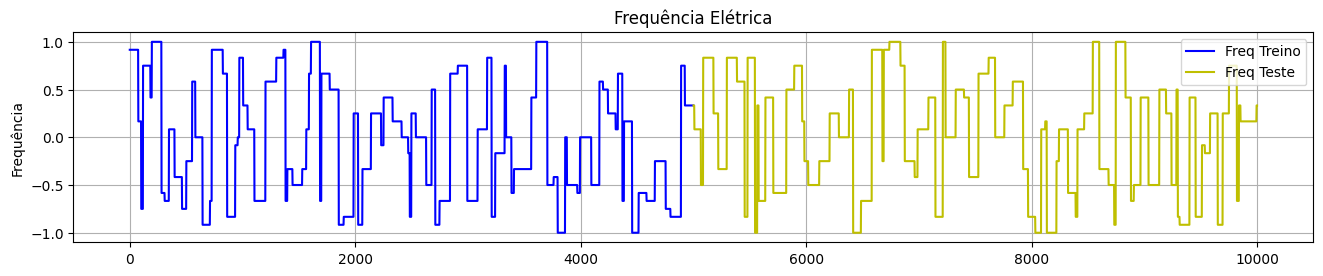

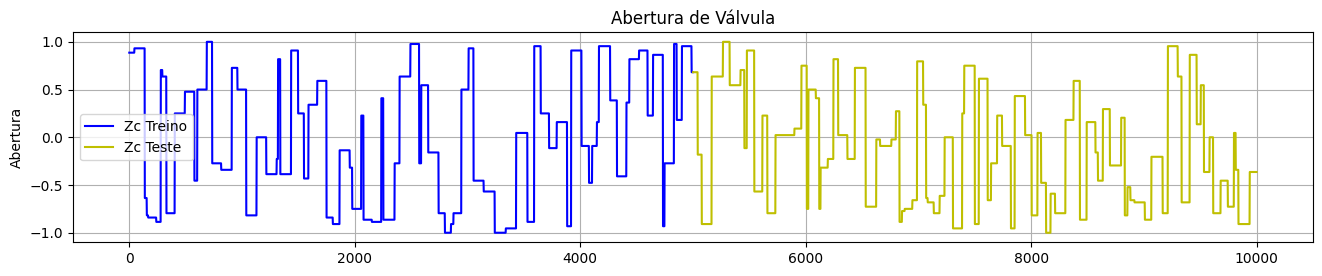

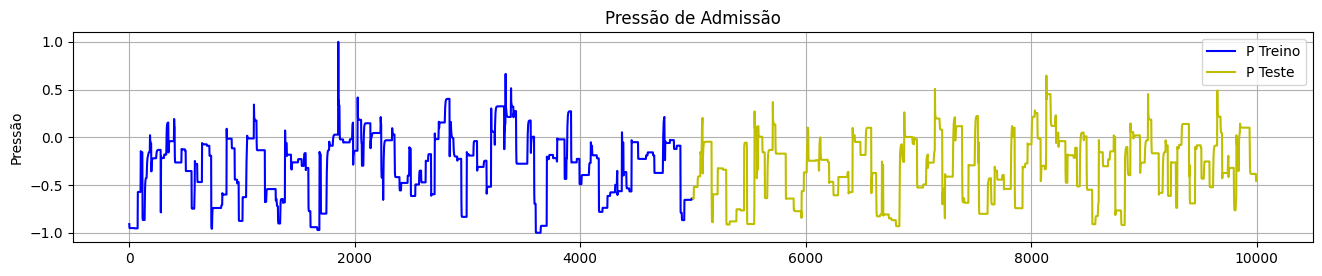

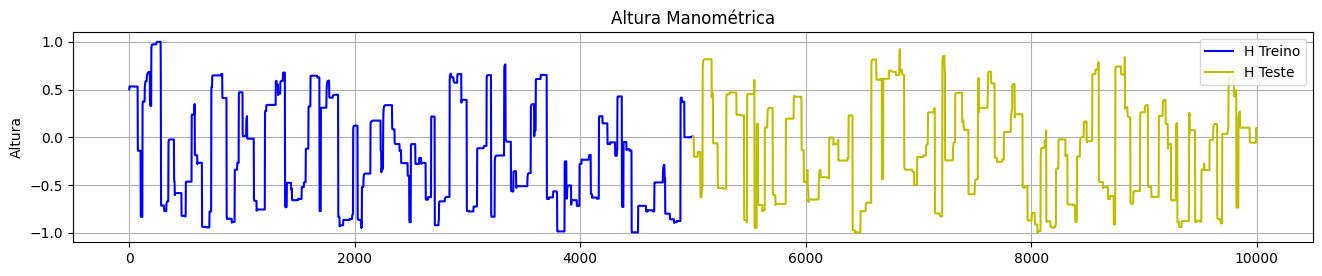

In [183]:
t_a = np.arange(0, t_final/2, 2)
#t_b = np.arange(t_final/2, 3*t_final/4, 2)
t_b = np.arange(t_final/2 ,t_final, 2)
#t_c = np.arange(3*t_final/4, t_final, 2)

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, X_train[:,0], label="Freq Treino", color='b')
plt.plot(t_b, X_test[:,0], label="Freq Teste", color='y')
#plt.plot(t_c, X_valid[:,0], label="Freq Validação", color='g')
plt.ylabel("Frequência")
plt.title("Frequência Elétrica")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, X_train[:,1], label="Zc Treino", color='b')
plt.plot(t_b, X_test[:,1], label="Zc Teste", color='y')
#plt.plot(t_c, X_valid[:,1], label="Zc Validação", color='g')
plt.ylabel("Abertura")
plt.title("Abertura de Válvula")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, Y_train[:,0], label="P Treino", color='b')
plt.plot(t_b, Y_test[:,0], label="P Teste", color='y')
#plt.plot(t_c[:], Y_valid[:,0], label="P Validação", color='g')
plt.ylabel("Pressão")
plt.title("Pressão de Admissão")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, Y_train[:,1], label="H Treino", color='b')
plt.plot(t_b, Y_test[:,1], label="H Teste", color='y')
#plt.plot(t_c, Y_valid[:,1], label="H Validação", color='g')
plt.ylabel("Altura")
plt.title("Altura Manométrica")
plt.grid(True)
plt.legend()
plt.show()


# GERANDO MODELO

In [184]:
'''
R2_p, R2_h = 0, 0
i = 0
melhor_R2 = -1
melhor_param = {}

while (R2_p < 0.86 or R2_h < 0.9) and i < 100:
    # Definindo parâmetros
    #seed = int(np.random.uniform(1, 100))
    units = int(np.random.uniform(100,300))
    alpha = np.random.uniform(0, 1)
    raio = np.random.uniform(0, 1)

    # Gerando modelo
    reservoir = Reservoir(
    units=units,             # Número de neurônios no reservatório (N)
    sr=raio,                # Raio Espectral (Spectral Radius) - O mais crítico!
    lr=alpha,                # Taxa de Vazamento (Leaking Rate) - Quão rápido os estados mudam
    input_scaling=0.1,     # Escala dos pesos de entrada
    seed=42
    )

    readout = Ridge(ridge=1e-7)
    BCS_model = reservoir >> readout

    # Treino
    BCS_model = BCS_model.fit(X_train, Y_train, warmup=20)

    # Teste
    Y_pred = BCS_model.run(X_test)
    R2_p = r2_score(Y_test[:,0], Y_pred[:,0])
    R2_h = r2_score(Y_test[:,1], Y_pred[:,1])
    R2  = [R2_p, R2_h]

    rmse_p = NRMSE(Y_test[:,0], Y_pred[:,0])
    rmse_h = NRMSE(Y_test[:,1], Y_pred[:,1])
    nrmse = [float(rmse_p), float(rmse_h)]
    
    print(f"Iteração {i+1:03d} | R²(P)={R2_p:.3f} | R²(H)={R2_h:.3f}")

    # Melhor modelo
    if (R2_p + R2_h)/2 > melhor_R2:
        melhor_R2 = (R2_p + R2_h)/2
        melhor_param = {
            #"seed": seed,
            "units": units,
            "alpha": alpha,
            "raio": raio,
            "R²": R2,
            "NRMSE": nrmse,
            "Iteração": i+1
        }
    i+=1
print("---------------------------------------------\nMelhor modelo encontrado:")
for k, v in melhor_param.items():
    print(f"{k}: {v}")
'''

'\nR2_p, R2_h = 0, 0\ni = 0\nmelhor_R2 = -1\nmelhor_param = {}\n\nwhile (R2_p < 0.86 or R2_h < 0.9) and i < 100:\n    # Definindo parâmetros\n    #seed = int(np.random.uniform(1, 100))\n    units = int(np.random.uniform(100,300))\n    alpha = np.random.uniform(0, 1)\n    raio = np.random.uniform(0, 1)\n\n    # Gerando modelo\n    reservoir = Reservoir(\n    units=units,             # Número de neurônios no reservatório (N)\n    sr=raio,                # Raio Espectral (Spectral Radius) - O mais crítico!\n    lr=alpha,                # Taxa de Vazamento (Leaking Rate) - Quão rápido os estados mudam\n    input_scaling=0.1,     # Escala dos pesos de entrada\n    seed=42\n    )\n\n    readout = Ridge(ridge=1e-7)\n    BCS_model = reservoir >> readout\n\n    # Treino\n    BCS_model = BCS_model.fit(X_train, Y_train, warmup=20)\n\n    # Teste\n    Y_pred = BCS_model.run(X_test)\n    R2_p = r2_score(Y_test[:,0], Y_pred[:,0])\n    R2_h = r2_score(Y_test[:,1], Y_pred[:,1])\n    R2  = [R2_p, R2_h]

# Modelagem

In [185]:
R2_p, R2_h = 0, 0
i = 0
melhor_R2 = -1
melhor_param = {}

while (R2_p < 0.85 or R2_h < 0.9) and i < 300:
    # Definindo parâmetros
    # seed = int(np.random.uniform(1, 100))
    units = int(np.random.uniform(10,300))
    alpha = np.random.uniform(0, 1)
    # raio = np.random.uniform(0, 1)
    raio = 0.9

    # Gerando modelo
    #rpy.set_seed(int(seed))
    reservoir = Reservoir(units, lr = alpha, sr = raio)

    readout = Ridge(ridge=1e0)
    BCS_model = reservoir >> readout

    # Treino
    BCS_model = BCS_model.fit(X_train, Y_train, warmup=0)
    #print(reservoir.initialized, readout.initialized)

    # Teste
    Y_pred = BCS_model.run(X_test)
    R2_p = r2_score(Y_test[:,0], Y_pred[:,0])
    R2_h = r2_score(Y_test[:,1], Y_pred[:,1])
    R2  = [R2_p, R2_h]

    rmse_p = NRMSE(Y_test[:,0], Y_pred[:,0])
    rmse_h = NRMSE(Y_test[:,1], Y_pred[:,1])
    nrmse = [float(rmse_p), float(rmse_h)]
    
    print(f"Iteração {i+1:03d} | R²(P)={R2_p:.3f} | R²(H)={R2_h:.3f}")

    # Melhor modelo
    if (R2_p + R2_h)/2 > melhor_R2:
        melhor_R2 = (R2_p + R2_h)/2
        melhor_param = {
            #"seed": seed,
            "units": units,
            "alpha": alpha,
            "raio": raio,
            "R²": R2,
            "NRMSE": nrmse,
            "Iteração": i+1
        }
    i+=1
print("----------------------------------------\nMelhor modelo encontrado:")
for k, v in melhor_param.items():
    print(f"{k}: {v}")

Iteração 001 | R²(P)=0.873 | R²(H)=0.989
----------------------------------------
Melhor modelo encontrado:
units: 83
alpha: 0.6815027222239293
raio: 0.9
R²: [0.8725366280982916, 0.989070159283087]
NRMSE: [0.07353491644159135, 0.028156135462865422]
Iteração: 1


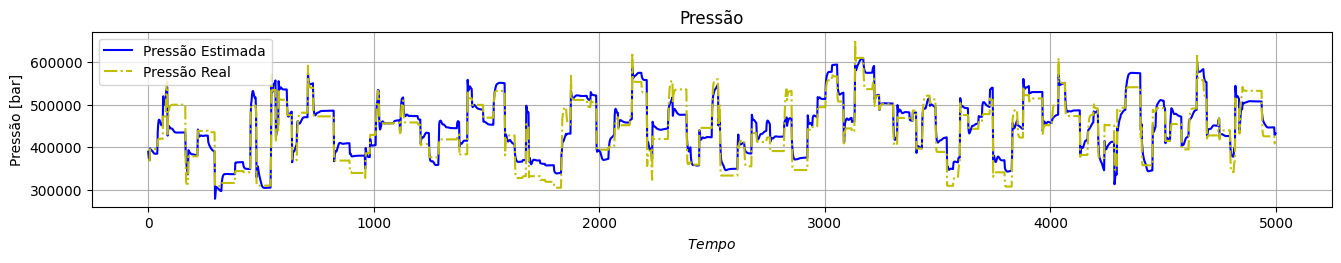

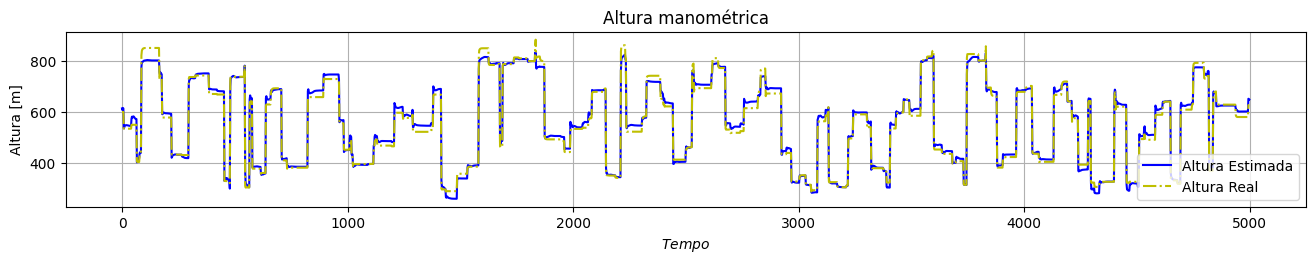

R²: [0.8725164629287037, 0.9890596189418936]
NRMSE: [0.07354073295732982, 0.028169708568220098]


In [186]:
Y_pred = BCS_model.run(X_test)

Y_pred = scaler_out.inverse_transform(Y_pred)
Y_test = scaler_out.inverse_transform(Y_test)
t_ = np.arange(0, t_final/2, dt)

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Pressão")
plt.xlabel("$Tempo$")
plt.ylabel("Pressão [bar]")
plt.plot(t_, Y_pred[:,0]/(10^(5)), label="Pressão Estimada", color="blue", linestyle="-")
plt.plot(t_, Y_test[:,0]/(10^(5)), label="Pressão Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Altura manométrica")
plt.xlabel("$Tempo$")
plt.ylabel("Altura [m]")
plt.plot(t_, Y_pred[:,1], label="Altura Estimada", color="blue", linestyle="-")
plt.plot(t_, Y_test[:,1], label="Altura Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

R2_p = r2_score(Y_test[:,0], Y_pred[:,0])
R2_h = r2_score(Y_test[:,1], Y_pred[:,1])
R2  = [R2_p, R2_h]
print(f"R²: {R2}")

rmse_p = NRMSE(Y_test[:,0], Y_pred[:,0])
rmse_h = NRMSE(Y_test[:,1], Y_pred[:,1])
nrmse = [float(rmse_p), float(rmse_h)]
print(f"NRMSE: {nrmse}")

# Horizonte de previsão

NRMSE médio para cada saída (Horizonte=10): [0.10063317712949355, 0.08142082947369035]


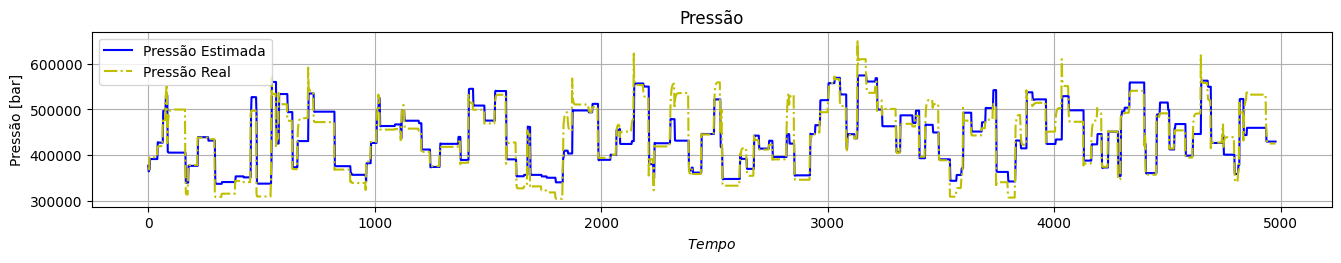

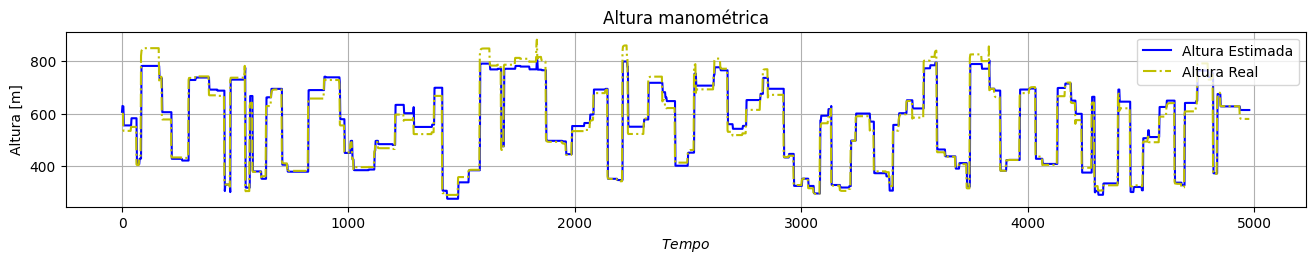

In [187]:
Horizonte = 10
Y_pred_multi = []

state = np.zeros(reservoir.units)

# Inicializa estado no começo do teste
_ = reservoir.run(X_test[0:1])

for t in range(len(X_test) - Horizonte):

    # Entrada real no primeiro passo
    current_input = X_test[t]

    # Forecasting Autoregressivo
    preds = []

    local_state = reservoir.run(current_input.reshape(1, -1))[0]

    for k in range(Horizonte):
        # Previsão k
        yk = readout(local_state)
        preds.append(yk)

        # Usa saída prevista como próxima entrada
        proxima_entrada = yk.reshape(1, -1)      # 2 entradas

        # Atualiza estado do reservoir
        local_state = reservoir.run(proxima_entrada)[0]

    Y_pred_multi.append(preds)

Y_pred_multi = np.array(Y_pred_multi)     # (N, 10, 2)

# Saídas reais equivalentes
Y_true_multi = []

for t in range(len(X_test) - Horizonte):
    Y_true_multi.append(Y_test[t+1:t+1+Horizonte])
 
Y_true_ = np.array(Y_true_multi)     # (N, 10, 2)

# Para comparar no espaço real:
Y_pred_ = scaler_out.inverse_transform(
    Y_pred_multi.reshape(-1, 2)
).reshape(Y_pred_multi.shape)
'''
Y_true_real = scaler_out.inverse_transform(
    Y_true_multi.reshape(-1, 2)
).reshape(Y_true_multi.shape)
'''
rmse_p = NRMSE(Y_true_[:,0,0], Y_pred_[:,0,0])
rmse_h = NRMSE(Y_true_[:,0,1], Y_pred_[:,0,1])
nrmse = [float(rmse_p), float(rmse_h)]

#rmse = np.sqrt(np.mean((Y_pred_multi - Y_true_multi)**2, axis=(0,1)))
print(f"NRMSE médio para cada saída (Horizonte={Horizonte}):", nrmse)

t_a = np.arange(0, t_final/2, dt)

l = int(2500-Horizonte)
plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Pressão")
plt.xlabel("$Tempo$")
plt.ylabel("Pressão [bar]")
plt.plot(t_a[:l], Y_pred_[:,0,0]/(10^(5)), label="Pressão Estimada", color="blue", linestyle="-")
plt.plot(t_a[:l], Y_true_[:,0,0]/(10^(5)), label="Pressão Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Altura manométrica")
plt.xlabel("$Tempo$")
plt.ylabel("Altura [m]")
plt.plot(t_a[:l], Y_pred_[:,0,1], label="Altura Estimada", color="blue", linestyle="-")
plt.plot(t_a[:l], Y_true_[:,0,1], label="Altura Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

# Teste Prático 1

R²: [0.9514834307779749, 0.9832152051668033]
NRMSE: [0.07661682681951244, 0.039541869500551254]


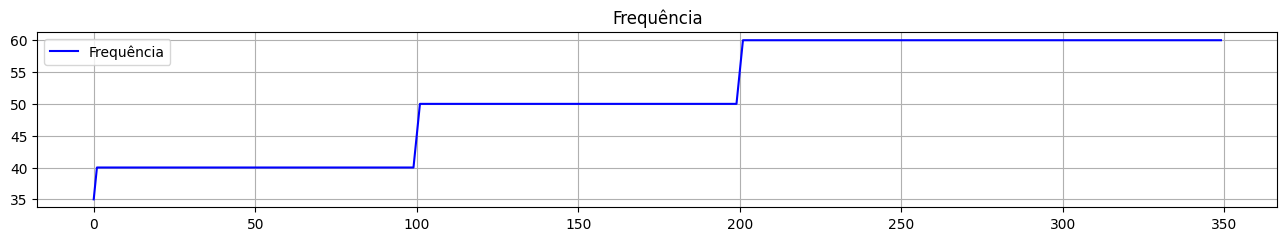

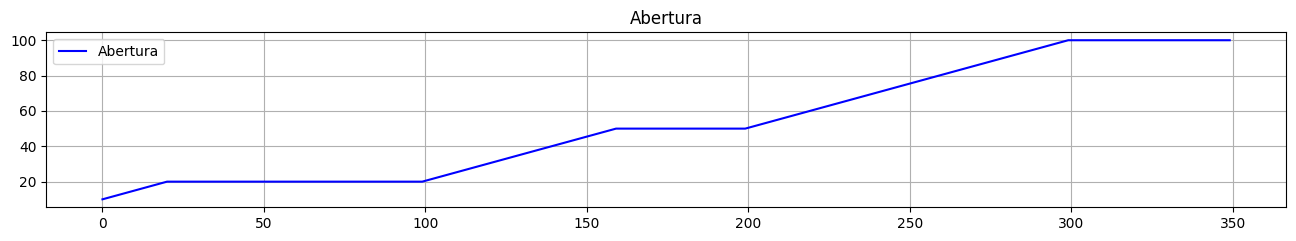

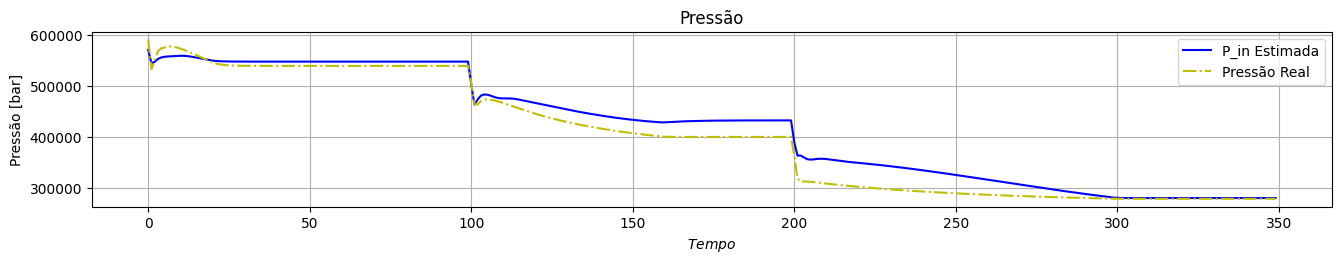

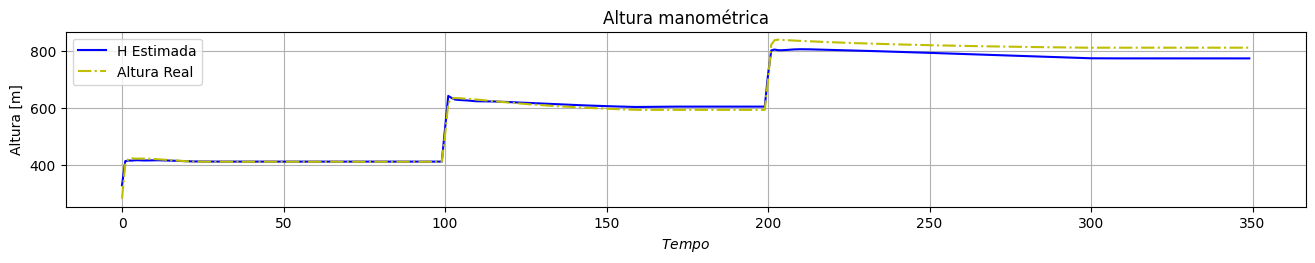

In [188]:
Saidas = pd.read_excel("Saidas_praticas_xlsx.xlsx")
Saidas = Saidas.to_numpy()
P_in = Saidas[:,0].reshape(-1,1)
H = Saidas[:,1].reshape(-1,1)

Ts = 1;         # período de amostragem
tsim = 350;     # tempo de simulação
nsim = tsim/Ts; # numero de amostras da simulação
Input = np.array([[0,0] , [35.00, 10.00]]) # Dados iniciais

for j in range(int(nsim)):

    tsim = j*Ts
    
    # ESP Start-up 
    if tsim > 0 and tsim < 100:
        #print(Input)
        Input = np.vstack([Input, Input[-1] + np.array([5, 0.5])])
        Input[-1] = np.minimum(Input[-1], [40, 20])
    
    if tsim > 99 and tsim < 200:
        Input = np.vstack([Input, Input[-1] + np.array([5, 0.5])])
        Input[-1] = np.minimum(Input[-1], [50, 50])

    if tsim > 199:
        Input = np.vstack([Input, Input[-1] + np.array([5, 0.5])])
        Input[-1] = np.minimum(Input[-1], [60, 100])
    
Input = np.delete(Input,[0], axis=0)

#print(Input)
Input = scaler_in.fit_transform(Input)   # entradas normalizadas
t_plt = np.arange(0, tsim+1, Ts)
Output = BCS_model.run(Input)

Input = scaler_in.inverse_transform(Input)
Output = scaler_out.inverse_transform(Output)

R2_p = r2_score(Saidas[:,0], Output[:,0])
R2_h = r2_score(Saidas[:,1], Output[:,1])
R2  = [R2_p, R2_h]
print(f"R²: {R2}")

rmse_p = NRMSE(Saidas[:,0], Output[:,0])
rmse_h = NRMSE(Saidas[:,1], Output[:,1])
nrmse = [float(rmse_p), float(rmse_h)]
print(f"NRMSE: {nrmse}")

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Frequência")
plt.plot(t_plt, Input[:,0], label="Frequência", color="blue", linestyle="-")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Abertura")
plt.plot(t_plt, Input[:,1], label="Abertura", color="blue", linestyle="-")
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Pressão")
plt.xlabel("$Tempo$")
plt.ylabel("Pressão [bar]")
plt.plot(t_plt, Output[:,0]/(10^(5)), label="P_in Estimada", color="blue", linestyle="-")
plt.plot(t_plt, Saidas[:,0]/(10^(5)), label="Pressão Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Altura manométrica")
plt.xlabel("$Tempo$")
plt.ylabel("Altura [m]")
plt.plot(t_plt, Output[:,1], label="H Estimada", color="blue", linestyle="-")
plt.plot(t_plt, Saidas[:,1], label="Altura Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

# Teste prático 2 

- Frequência constante

R²: [-3.9305621533085935, -127.81872120724938]
NRMSE: [0.6977573772191874, 2.69642268824971]


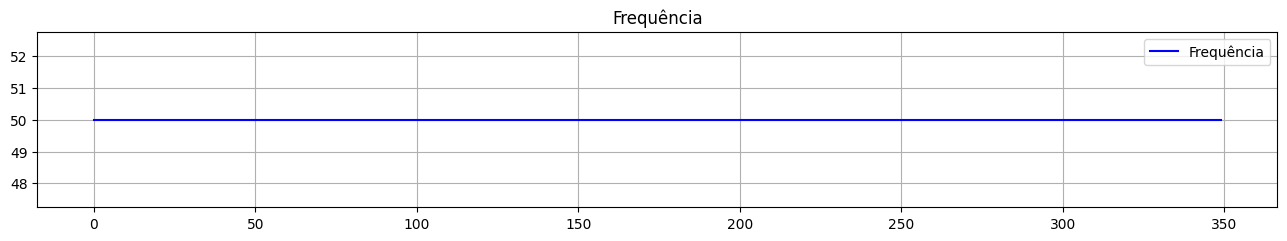

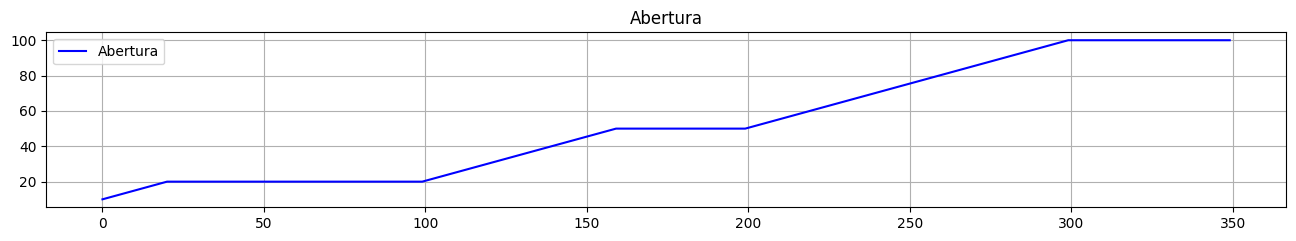

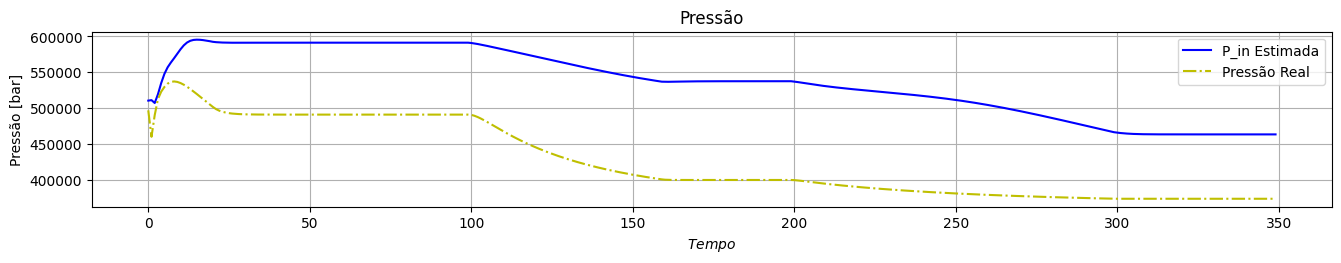

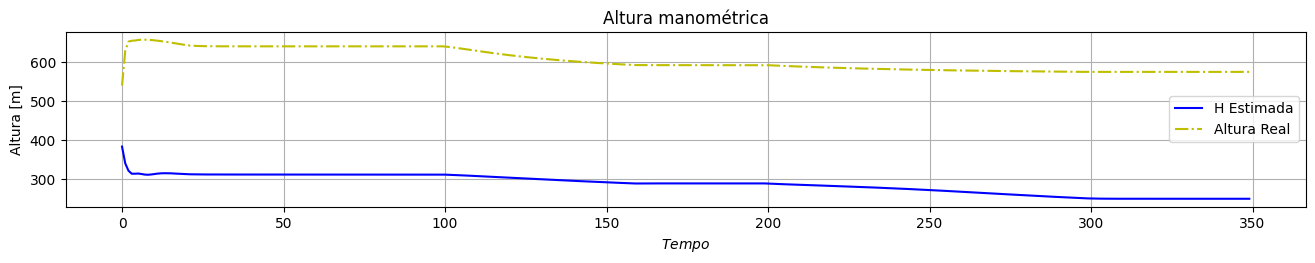

In [189]:
Saidas = pd.read_excel("f_const_xlsx.xlsx")
Saidas = Saidas.to_numpy()
P_in = Saidas[:,0].reshape(-1,1)
H = Saidas[:,1].reshape(-1,1)

Ts = 1;         # período de amostragem
tsim = 350;     # tempo de simulação
nsim = tsim/Ts; # numero de amostras da simulação
fconst = int(50)
Input = np.array([[0,0] , [fconst, 10.00]]) # Dados iniciais

for j in range(int(nsim)):

    tsim = j*Ts
    
    # ESP Start-up 
    if tsim > 0 and tsim < 100:
        Input = np.vstack([Input, Input[-1] + np.array([fconst , 0.5])])
        Input[-1] = np.minimum(Input[-1], [fconst, 20])
    
    if tsim > 99 and tsim < 200:
        Input = np.vstack([Input, Input[-1] + np.array([fconst , 0.5])])
        Input[-1] = np.minimum(Input[-1], [fconst , 50])

    if tsim > 199:
        Input = np.vstack([Input, Input[-1] + np.array([fconst , 0.5])])
        Input[-1] = np.minimum(Input[-1], [fconst , 100])
    
Input = np.delete(Input,[0], axis=0)

Input = scaler_in.fit_transform(Input)   # entradas normalizadas
t_plt = np.arange(0, tsim+1, Ts)
Output = BCS_model.run(Input)

Input = scaler_in.inverse_transform(Input)
Output = scaler_out.inverse_transform(Output)

R2_p = r2_score(Saidas[:,0], Output[:,0])
R2_h = r2_score(Saidas[:,1], Output[:,1])
R2  = [R2_p, R2_h]
print(f"R²: {R2}")

rmse_p = NRMSE(Saidas[:,0], Output[:,0])
rmse_h = NRMSE(Saidas[:,1], Output[:,1])
nrmse = [float(rmse_p), float(rmse_h)]
print(f"NRMSE: {nrmse}")

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Frequência")
plt.plot(t_plt, Input[:,0], label="Frequência", color="blue", linestyle="-")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Abertura")
plt.plot(t_plt, Input[:,1], label="Abertura", color="blue", linestyle="-")
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Pressão")
plt.xlabel("$Tempo$")
plt.ylabel("Pressão [bar]")
plt.plot(t_plt, Output[:,0]/(10^(5)), label="P_in Estimada", color="blue", linestyle="-")
plt.plot(t_plt, Saidas[:,0]/(10^(5)), label="Pressão Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Altura manométrica")
plt.xlabel("$Tempo$")
plt.ylabel("Altura [m]")
plt.plot(t_plt, Output[:,1], label="H Estimada", color="blue", linestyle="-")
plt.plot(t_plt, Saidas[:,1], label="Altura Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

# Teste prático 3

- Abertura constante

R²: [-0.717472895735578, 0.985328485776013]
NRMSE: [0.4070817448684921, 0.04701527742112106]


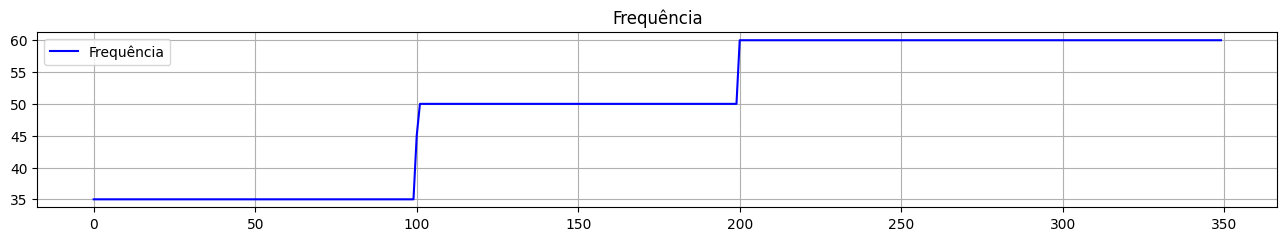

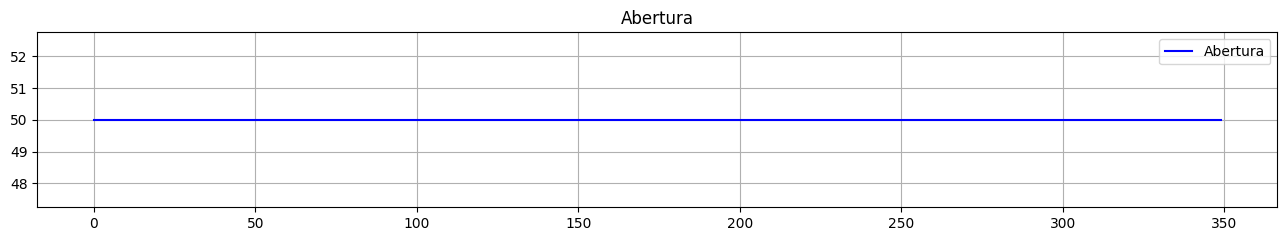

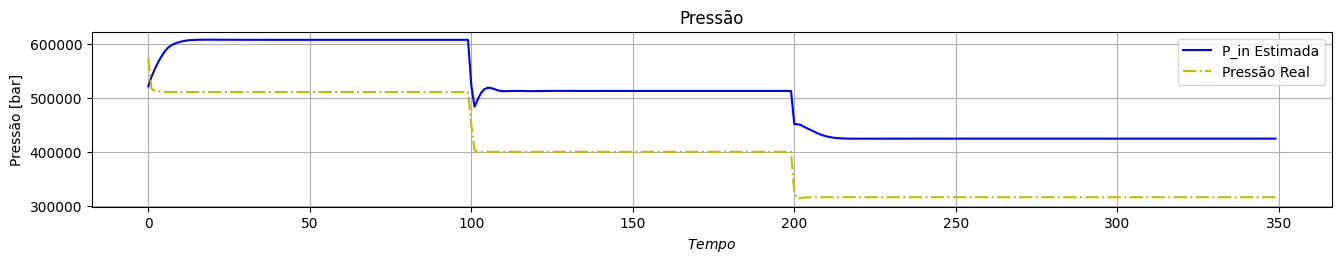

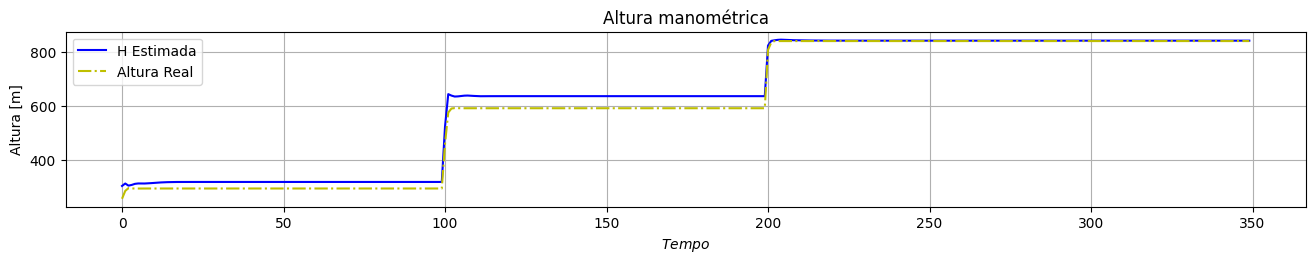

In [190]:
Saidas = pd.read_excel("zc_const_xlsx.xlsx")
Saidas = Saidas.to_numpy()
P_in = Saidas[:,0].reshape(-1,1)
H = Saidas[:,1].reshape(-1,1)

Ts = 1;         # período de amostragem
tsim = 350;     # tempo de simulação
nsim = tsim/Ts; # numero de amostras da simulação
zcconst = int(50)
Input = np.array([[0,0] , [35.00, zcconst]]) # Dados iniciais

for j in range(int(nsim)):

    tsim = j*Ts
    
    # ESP Start-up 
    if tsim > 0 and tsim < 100:
        Input = np.vstack([Input, Input[-1] + np.array([10, zcconst])])
        Input[-1] = np.minimum(Input[-1], [35, zcconst])
    
    if tsim > 99 and tsim < 200:
        Input = np.vstack([Input, Input[-1] + np.array([10, zcconst])])
        Input[-1] = np.minimum(Input[-1], [50, zcconst])

    if tsim > 199:
        Input = np.vstack([Input, Input[-1] + np.array([10, zcconst])])
        Input[-1] = np.minimum(Input[-1], [60, zcconst])
    
Input = np.delete(Input,[0], axis=0)


Input = scaler_in.fit_transform(Input)   # entradas normalizadas
t_plt = np.arange(0, tsim+1, Ts)
Output = BCS_model.run(Input)

Input = scaler_in.inverse_transform(Input)
Output = scaler_out.inverse_transform(Output)

R2_p = r2_score(Saidas[:,0], Output[:,0])
R2_h = r2_score(Saidas[:,1], Output[:,1])
R2  = [R2_p, R2_h]
print(f"R²: {R2}")

rmse_p = NRMSE(Saidas[:,0], Output[:,0])
rmse_h = NRMSE(Saidas[:,1], Output[:,1])
nrmse = [float(rmse_p), float(rmse_h)]
print(f"NRMSE: {nrmse}")

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Frequência")
plt.plot(t_plt, Input[:,0], label="Frequência", color="blue", linestyle="-")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Abertura")
plt.plot(t_plt, Input[:,1], label="Abertura", color="blue", linestyle="-")
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Pressão")
plt.xlabel("$Tempo$")
plt.ylabel("Pressão [bar]")
plt.plot(t_plt, Output[:,0]/(10^(5)), label="P_in Estimada", color="blue", linestyle="-")
plt.plot(t_plt, Saidas[:,0]/(10^(5)), label="Pressão Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Altura manométrica")
plt.xlabel("$Tempo$")
plt.ylabel("Altura [m]")
plt.plot(t_plt, Output[:,1], label="H Estimada", color="blue", linestyle="-")
plt.plot(t_plt, Saidas[:,1], label="Altura Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()